In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.2.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.5
pandas 1.0.4
sklearn 0.23.1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [6]:
#特征数目
print(x_train.shape[1:])

(8,)


In [10]:
#这部分在搭建deep模型
# 函数式API 功能API,和之前不一样
input = keras.layers.Input(shape=x_train.shape[1:])
print(input)
#input作为输入
hidden1 = keras.layers.Dense(30, activation='relu')(input)
print(hidden1)
#hidden1作为输入
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
# 复合函数: f(x) = h(g(x))

#假设wide模型和deep模型的输入是一样的，wide是input，deep是hidden2对吗？
#concatenate是特征接起来了
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)

#然后定义model，放入input，output
model = keras.models.Model(inputs = [input],
                           outputs = [output])

model.summary()
model.compile(loss="mean_squared_error",
              optimizer = keras.optimizers.SGD(0.001))
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-3)]

Tensor("input_4:0", shape=(None, 8), dtype=float32)
Tensor("dense_9/Identity:0", shape=(None, 30), dtype=float32)
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           270         input_4[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           930         dense_9[0][0]                    
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 38)           0           input_4[0][0

In [7]:
model.layers

In [11]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 1.5599 - val_loss: 0.8264
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.7138 - val_loss: 0.7326
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.6421 - val_loss: 0.6720
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5942 - val_loss: 0.6240
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5576 - val_loss: 0.5885
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5286 - val_loss: 0.5593
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5075 - val_loss: 0.5392
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4904 - val_loss: 0.5170
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4782 - val_loss: 0.5074
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4690 - val_lo

363/363 [==============================] - 1s 2ms/step - loss: 0.3495 - val_loss: 0.3646
Epoch 82/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3493 - val_loss: 0.3647
Epoch 83/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3507 - val_loss: 0.3653
Epoch 84/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3496 - val_loss: 0.3637
Epoch 85/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3481 - val_loss: 0.3632
Epoch 86/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3475 - val_loss: 0.3619
Epoch 87/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3466 - val_loss: 0.3619
Epoch 88/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3461 - val_loss: 0.3602
Epoch 89/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3457 - val_loss: 0.3612
Epoch 90/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3458 - val_loss: 

In [12]:
print(history.history)

{'loss': [1.5598963499069214, 0.7138344049453735, 0.6420512199401855, 0.5941908359527588, 0.5575886964797974, 0.5285685658454895, 0.507496178150177, 0.49043235182762146, 0.4782475531101227, 0.46896129846572876, 0.45993363857269287, 0.45303112268447876, 0.44718554615974426, 0.44132113456726074, 0.4353330135345459, 0.43120187520980835, 0.4279574453830719, 0.42447125911712646, 0.4208816885948181, 0.4179380536079407, 0.4150495231151581, 0.4118747115135193, 0.41042858362197876, 0.40756756067276, 0.40404012799263, 0.4028661847114563, 0.4004153907299042, 0.39917251467704773, 0.39645642042160034, 0.3946709632873535, 0.3924272954463959, 0.39123210310935974, 0.39006152749061584, 0.38935333490371704, 0.38823258876800537, 0.38608744740486145, 0.3848415017127991, 0.3832572102546692, 0.3821588456630707, 0.3807392716407776, 0.3805152177810669, 0.3783695697784424, 0.3783372938632965, 0.37781837582588196, 0.37554675340652466, 0.37433940172195435, 0.37374821305274963, 0.3741287887096405, 0.3733946979045

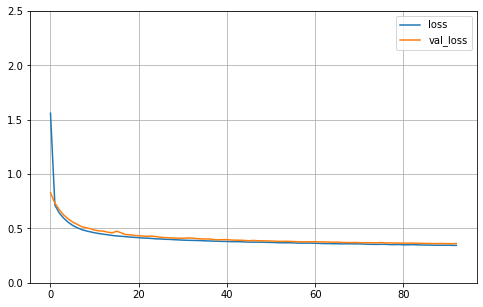

In [13]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2.5)
    plt.show()
plot_learning_curves(history)

In [14]:
#不是这个模型不好，而是搭建的比较简单
model.evaluate(x_test_scaled, y_test, verbose=0)

0.3649013638496399